In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

# Load the dataset
data = pd.read_csv('zoo2.csv')  # Update with your dataset path

# Preview the data
data.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3


In [3]:
# Check for missing values
print(data.isnull().sum())

# Check data types and summary
print(data.info())
print(data.describe())


animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  43 non-null     object
 1   hair         43 non-null     int64 
 2   feathers     43 non-null     int64 
 3   eggs         43 non-null     int64 
 4   milk         43 non-null     int64 
 5   airborne     43 non-null     int64 
 6   aquatic      43 non-null     int64 
 7   predator     43 non-null     int64 
 8   toothed      43 non-null     int64 
 9   backbone     43 non-null     int64 
 10  breathes     43 non-null     int64 
 11  venomous     43 non-null     int64 
 12 

In [6]:
# Define features (X) and target (y)
X = data.drop(columns=['animal_name', 'class_type'])  # Drop non-informative column
y = data['class_type']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



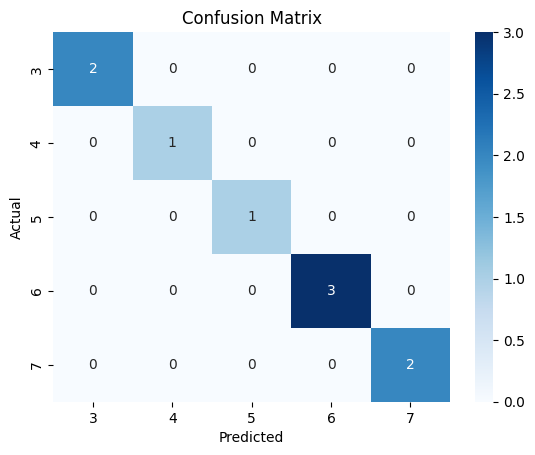

In [7]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


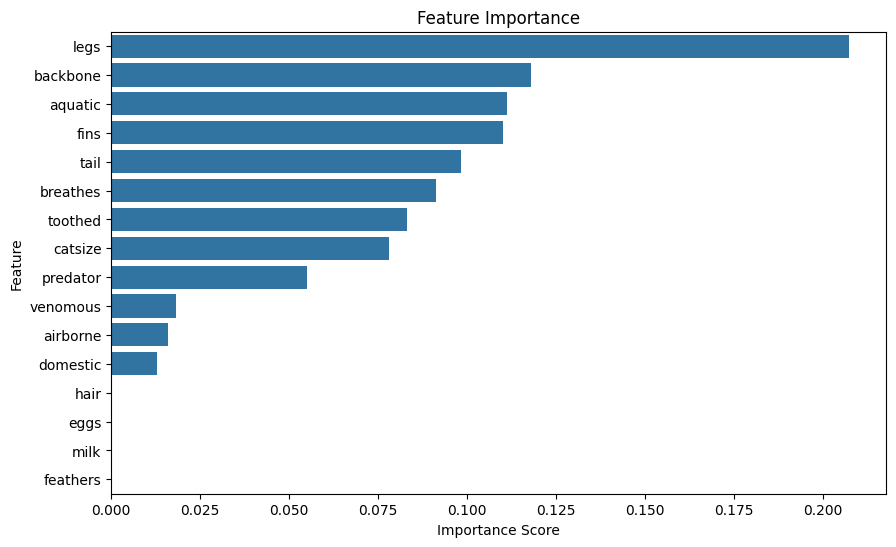

In [8]:
# Calculate feature importance
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()
